In [ ]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, LambdaCallback, TensorBoard
from sklearn.preprocessing import LabelBinarizer
from tensorflow.nn import local_response_normalization  # lrn
import matplotlib.pyplot as plt
import io
import pandas as pd
from PIL import Image
import numpy as np
from numpy import asarray
import cv2
import glob
import os
import cv2
from tqdm import tqdm
from imutils import paths

### 데이터 다운로드

In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
uploaded file "kaggle.json" with length 62 bytes


In [ ]:
ls -1ha ~/.kaggle/kaggle.json

/root/.kaggle/kaggle.json


In [ ]:
from google.colab import drive #Google Drive와 연동
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from os.path import join   # 경로 설정

DRIVE_PATH = '/content/drive/Shareddrives/yeja/Garbage classification/data' # DRIVE path 정의
%cd "{DRIVE_PATH}"

/content/drive/Shareddrives/yeja/Garbage classification/data


In [ ]:
!kaggle datasets download -d mostafaabla/garbage-classification # Kaggle data download

garbage-classification.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!ls # 설치 확인

data  garbage_classification  garbage-classification.zip


In [ ]:
!unzip garbage-classification.zip # unzip

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 데이터 부풀리기

In [ ]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
np.random.seed(5) # 랜덤 시드 고정

data_aug_gen = ImageDataGenerator(rescale=1./255, # rotate, shift, zoom 등 다양하게 이미지 변형
                                  rotation_range=15,
                                  width_shift_range=0.1,
                                  height_shift_range=0.1,
                                  shear_range=0.5,
                                  zoom_range=[0.8, 2.0],
                                  horizontal_flip=True,
                                  vertical_flip=True,
                                  fill_mode='nearest')
path = '/content/drive/Shareddrives/yeja/Garbage classification/data/garbage_classification/brown-glass'
file_list = os.listdir(path)
for i in file_list: #path 안에 파일들을 하나씩 불러옴
    img = load_img('/content/drive/Shareddrives/yeja/Garbage classification/data/garbage_classification/brown-glass/%s'%i) # 이미지 불러오기
    x = img_to_array(img)
    x = x.reshape((1,) + x.shape)

    count = 0 # jpg 형태로 해당 디렉토리에 저장
    for batch in data_aug_gen.flow(x, batch_size=1, save_to_dir='/content/drive/Shareddrives/yeja/Garbage classification/data/data/glass/', save_prefix='tri', save_format='jpg'): 
        count += 1
        if count > 8:
            break

In [ ]:
import numpy as np
import os

# 랜덤시드 고정시키기
np.random.seed(5)
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

# 데이터셋 불러오기
data_aug_gen = ImageDataGenerator(rescale=1./255, 
                                  rotation_range=15,
                                  width_shift_range=0.1,
                                  height_shift_range=0.1,
                                  shear_range=0.5,
                                  zoom_range=[0.8, 2.0],
                                  horizontal_flip=True,
                                  vertical_flip=True,
                                  fill_mode='nearest')
path = '/content/drive/Shareddrives/yeja/Garbage classification/data/garbage_classification/green-glass'
file_list = os.listdir(path)
for i in file_list:
    img = load_img('/content/drive/Shareddrives/yeja/Garbage classification/data/garbage_classification/green-glass/%s'%i)
    x = img_to_array(img)
    x = x.reshape((1,) + x.shape)

    count = 0
# 이 for는 무한으로 반복되기 때문에 우리가 원하는 반복횟수를 지정하여, 지정된 반복횟수가 되면 빠져나오도록 해야합니다.
    for batch in data_aug_gen.flow(x, batch_size=1, save_to_dir='/content/drive/Shareddrives/yeja/Garbage classification/data/data/glass/', save_prefix='tri', save_format='jpg'):
        count += 1
        if count > 8:
            break
print("Complete")

Complete


In [ ]:
import numpy as np
import os

# 랜덤시드 고정시키기
np.random.seed(5)
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

# 데이터셋 불러오기
data_aug_gen = ImageDataGenerator(rescale=1./255, 
                                  rotation_range=15,
                                  width_shift_range=0.1,
                                  height_shift_range=0.1,
                                  shear_range=0.5,
                                  zoom_range=[0.8, 2.0],
                                  horizontal_flip=True,
                                  vertical_flip=True,
                                  fill_mode='nearest')
path = '/content/drive/Shareddrives/yeja/Garbage classification/data/garbage_classification/white-glass'
file_list = os.listdir(path)
for i in file_list:
    img = load_img('/content/drive/Shareddrives/yeja/Garbage classification/data/garbage_classification/white-glass/%s'%i)
    x = img_to_array(img)
    x = x.reshape((1,) + x.shape)

    count = 0
# 이 for는 무한으로 반복되기 때문에 우리가 원하는 반복횟수를 지정하여, 지정된 반복횟수가 되면 빠져나오도록 해야합니다.
    for batch in data_aug_gen.flow(x, batch_size=1, save_to_dir='/content/drive/Shareddrives/yeja/Garbage classification/data/data/glass/', save_prefix='tri', save_format='jpg'):
        count += 1
        if count > 8:
            break

In [ ]:
import numpy as np
import os

# 랜덤시드 고정시키기
np.random.seed(5)
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

# 데이터셋 불러오기
data_aug_gen = ImageDataGenerator(rescale=1./255, 
                                  rotation_range=15,
                                  width_shift_range=0.1,
                                  height_shift_range=0.1,
                                  shear_range=0.5,
                                  zoom_range=[0.8, 2.0],
                                  horizontal_flip=True,
                                  vertical_flip=True,
                                  fill_mode='nearest')
path = '/content/drive/Shareddrives/yeja/Garbage classification/glass'
file_list = os.listdir(path)
for i in file_list:
    img = load_img('/content/drive/Shareddrives/yeja/Garbage classification/glass/%s'%i)
    x = img_to_array(img)
    x = x.reshape((1,) + x.shape)

    count = 0
# 이 for는 무한으로 반복되기 때문에 우리가 원하는 반복횟수를 지정하여, 지정된 반복횟수가 되면 빠져나오도록 해야합니다.
    for batch in data_aug_gen.flow(x, batch_size=1, save_to_dir='/content/drive/Shareddrives/yeja/Garbage classification/data/data/glass/', save_prefix='tri', save_format='jpg'):
        count += 1
        if count > 8:
            break

In [ ]:
from imutils import paths

search_dir = "/content/drive/Shareddrives/yeja/Garbage classification/data/data/paper"

image_paths = sorted(
    list(paths.list_images(search_dir))
)

print(">>> image count =", len(image_paths))
print(image_paths)

>>> image count = 8094
['/content/drive/Shareddrives/yeja/Garbage classification/data/data/paper/tri_0_0.jpg', '/content/drive/Shareddrives/yeja/Garbage classification/data/data/paper/tri_0_1.jpg', '/content/drive/Shareddrives/yeja/Garbage classification/data/data/paper/tri_0_10.jpg', '/content/drive/Shareddrives/yeja/Garbage classification/data/data/paper/tri_0_100.jpg', '/content/drive/Shareddrives/yeja/Garbage classification/data/data/paper/tri_0_1000.jpg', '/content/drive/Shareddrives/yeja/Garbage classification/data/data/paper/tri_0_1001.jpg', '/content/drive/Shareddrives/yeja/Garbage classification/data/data/paper/tri_0_1003.jpg', '/content/drive/Shareddrives/yeja/Garbage classification/data/data/paper/tri_0_1004.jpg', '/content/drive/Shareddrives/yeja/Garbage classification/data/data/paper/tri_0_1005.jpg', '/content/drive/Shareddrives/yeja/Garbage classification/data/data/paper/tri_0_1008.jpg', '/content/drive/Shareddrives/yeja/Garbage classification/data/data/paper/tri_0_1009.j

In [ ]:
import numpy as np
import os

# 랜덤시드 고정시키기
np.random.seed(5)
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

# 데이터셋 불러오기
train_datagen = ImageDataGenerator(rescale=1./255)
data_aug_gen = ImageDataGenerator(rescale=1./255, 
                                  rotation_range=15,
                                  width_shift_range=0.1,
                                  height_shift_range=0.1,
                                  shear_range=0.5,
                                  zoom_range=[0.8, 2.0],
                                  horizontal_flip=True,
                                  vertical_flip=True,
                                  fill_mode='nearest')
path = '/content/drive/Shareddrives/yeja/Garbage classification/data/garbage_classification/metal'
file_list = os.listdir(path)
for i in file_list:
    img = load_img('/content/drive/Shareddrives/yeja/Garbage classification/data/garbage_classification/metal/%s'%i)
    x = img_to_array(img)
    x = x.reshape((1,) + x.shape)

    count = 0
# 이 for는 무한으로 반복되기 때문에 우리가 원하는 반복횟수를 지정하여, 지정된 반복횟수가 되면 빠져나오도록 해야합니다.
    for batch in data_aug_gen.flow(x, batch_size=1, save_to_dir='/content/drive/Shareddrives/yeja/Garbage classification/data/data/metal/', save_prefix='tri', save_format='jpg'):
        count += 1
        if count > 12:
            break
print("complete")

complete


In [ ]:
import numpy as np
import os

# 랜덤시드 고정시키기
np.random.seed(5)
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

# 데이터셋 불러오기
train_datagen = ImageDataGenerator(rescale=1./255)
data_aug_gen = ImageDataGenerator(rescale=1./255, 
                                  rotation_range=15,
                                  width_shift_range=0.1,
                                  height_shift_range=0.1,
                                  shear_range=0.5,
                                  zoom_range=[0.8, 2.0],
                                  horizontal_flip=True,
                                  vertical_flip=True,
                                  fill_mode='nearest')
path = '/content/drive/Shareddrives/yeja/Garbage classification/data/garbage_classification/paper'
file_list = os.listdir(path)
for i in file_list:
    img = load_img('/content/drive/Shareddrives/yeja/Garbage classification/data/garbage_classification/paper/%s'%i)
    x = img_to_array(img)
    x = x.reshape((1,) + x.shape)

    count = 0
# 이 for는 무한으로 반복되기 때문에 우리가 원하는 반복횟수를 지정하여, 지정된 반복횟수가 되면 빠져나오도록 해야합니다.
    for batch in data_aug_gen.flow(x, batch_size=1, save_to_dir='/content/drive/Shareddrives/yeja/Garbage classification/data/data/paper/', save_prefix='tri', save_format='jpg'):
        count += 1
        if count > 15:
            break
print("complete")

complete


In [ ]:
import numpy as np
import os

# 랜덤시드 고정시키기
np.random.seed(5)
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

# 데이터셋 불러오기
train_datagen = ImageDataGenerator(rescale=1./255)
data_aug_gen = ImageDataGenerator(rescale=1./255, 
                                  rotation_range=15,
                                  width_shift_range=0.1,
                                  height_shift_range=0.1,
                                  shear_range=0.5,
                                  zoom_range=[0.8, 2.0],
                                  horizontal_flip=True,
                                  vertical_flip=True,
                                  fill_mode='nearest')
path = '/content/drive/Shareddrives/yeja/Garbage classification/data/garbage_classification/plastic'
file_list = os.listdir(path)
for i in file_list:
    img = load_img('/content/drive/Shareddrives/yeja/Garbage classification/data/garbage_classification/plastic/%s'%i)
    x = img_to_array(img)
    x = x.reshape((1,) + x.shape)

    count = 0
# 이 for는 무한으로 반복되기 때문에 우리가 원하는 반복횟수를 지정하여, 지정된 반복횟수가 되면 빠져나오도록 해야합니다.
    for batch in data_aug_gen.flow(x, batch_size=1, save_to_dir='/content/drive/Shareddrives/yeja/Garbage classification/data/data/plastic/', save_prefix='tri', save_format='jpg'):
        count += 1
        if count > 12:
            break
print("complete")

complete


### 데이터 배열 안에 넣기

In [ ]:
import os
import cv2
from tqdm import tqdm
from imutils import paths

search_dir = "/content/drive/Shareddrives/yeja/Garbage classification/cardboard_copy"

image_paths = sorted(
    list(paths.list_images(search_dir))
)
image_dim = (150, 150, 3)
labels = []
images = []
for image_path in tqdm(image_paths):
    image = cv2.imread(image_path)

    image = cv2.resize(
        image, (image_dim[1], image_dim[0])
    )
    images.append(image)
    
    label = "cardboard"
    labels.append([label])
    
print(">>> images count =", len(images))

search_dir = "/content/drive/Shareddrives/yeja/Garbage classification/data/data/paper"

image_paths = sorted(
    list(paths.list_images(search_dir))
)

for image_path in tqdm(image_paths):
    image = cv2.imread(image_path)

    image = cv2.resize(
        image, (image_dim[1], image_dim[0])
    )
    images.append(image)
    
    label = "paper"
    labels.append([label])
    
search_dir = "/content/drive/Shareddrives/yeja/Garbage classification/data/data/glass"

image_paths = sorted(
    list(paths.list_images(search_dir))
)

for image_path in tqdm(image_paths):
    image = cv2.imread(image_path)

    image = cv2.resize(
        image, (image_dim[1], image_dim[0])
    )
    images.append(image)
    
    label = "glass"
    labels.append([label])

search_dir = "/content/drive/Shareddrives/yeja/Garbage classification/data/data/metal"

image_paths = sorted(
    list(paths.list_images(search_dir))
)

for image_path in tqdm(image_paths):
    image = cv2.imread(image_path)

    image = cv2.resize(
        image, (image_dim[1], image_dim[0])
    )
    images.append(image)
    
    label = "metal"
    labels.append([label])
    
print(">>> images count =", len(images))

search_dir = "/content/drive/Shareddrives/yeja/Garbage classification/data/data/plastic"

image_paths = sorted(
    list(paths.list_images(search_dir))
)

for image_path in tqdm(image_paths):
    image = cv2.imread(image_path)

    image = cv2.resize(
        image, (image_dim[1], image_dim[0])
    )
    images.append(image)
    
    label = "plastic"
    labels.append([label])
    
print(">>> images count =", len(images))

search_dir = "/content/drive/Shareddrives/yeja/Garbage classification/trash_copy"

image_paths = sorted(
    list(paths.list_images(search_dir))
)

for image_path in tqdm(image_paths):
    image = cv2.imread(image_path)

    image = cv2.resize(
        image, (image_dim[1], image_dim[0])
    )
    images.append(image)
    
    label = "trash"
    labels.append([label])
    
print(">>> images count =", len(images))

100%|██████████| 4727/4727 [01:49<00:00, 43.07it/s] 


>>> images count = 4727


100%|██████████| 6254/6254 [02:54<00:00, 35.81it/s] 


>>> images count = 24098


100%|██████████| 6686/6686 [02:14<00:00, 49.53it/s] 


>>> images count = 30784


100%|██████████| 6417/6417 [01:43<00:00, 62.24it/s] 

>>> images count = 37201


### 전처리 및 분할

In [ ]:
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split

images = np.array(images, dtype='float32')/255.0 # image를 255로 나눠 1~0 사이의 숫자의 배열로 변형
labels = np.array(labels)

mlb = MultiLabelBinarizer() # multi label 전처리 모듈 사용
enc_labels = mlb.fit_transform(labels)

print(">>> classes name =", mlb.classes_)

x_train = images
y_train = enc_labels

>>> classes name = ['cardboard' 'glass' 'metal' 'paper' 'plastic' 'trash']


### test, val

In [20]:
import os
import cv2
from tqdm import tqdm
from imutils import paths

search_dir = "/content/drive/Shareddrives/yeja/Garbage classification/cardboard"

image_dim = (150, 150, 3)

image_paths = sorted(
    list(paths.list_images(search_dir))
)
test_labels = []
test_images = []
for image_path in tqdm(image_paths):
    test_image = cv2.imread(image_path)

    test_image = cv2.resize(
        test_image, (image_dim[1], image_dim[0])
    )
    test_images.append(test_image)
    
    test_label = "cardboard"
    test_labels.append([test_label])
    
print(">>> images count =", len(test_images))
search_dir = "/content/drive/Shareddrives/yeja/Garbage classification/glass"

image_paths = sorted(
    list(paths.list_images(search_dir))
)
for image_path in tqdm(image_paths):
    test_image = cv2.imread(image_path)

    test_image = cv2.resize(
        test_image, (image_dim[1], image_dim[0])
    )
    test_images.append(test_image)
    
    test_label = "glass"
    test_labels.append([test_label])
    
print(">>> images count =", len(test_images))
search_dir = "/content/drive/Shareddrives/yeja/Garbage classification/data/garbage_classification/metal"

image_paths = sorted(
    list(paths.list_images(search_dir))
)
for image_path in tqdm(image_paths):
    test_image = cv2.imread(image_path)

    test_image = cv2.resize(
        test_image, (image_dim[1], image_dim[0])
    )
    test_images.append(test_image)
    
    test_label = "metal"
    test_labels.append([test_label])
    
print(">>> images count =", len(test_images))
search_dir = "/content/drive/Shareddrives/yeja/Garbage classification/data/garbage_classification/paper"

image_paths = sorted(
    list(paths.list_images(search_dir))
)
for image_path in tqdm(image_paths):
    test_image = cv2.imread(image_path)

    test_image = cv2.resize(
        test_image, (image_dim[1], image_dim[0])
    )
    test_images.append(test_image)
    
    test_label = "paper"
    test_labels.append([test_label])
    
print(">>> images count =", len(test_images))
search_dir = "/content/drive/Shareddrives/yeja/Garbage classification/data/garbage_classification/plastic"

image_paths = sorted(
    list(paths.list_images(search_dir))
)
for image_path in tqdm(image_paths):
    test_image = cv2.imread(image_path)

    test_image = cv2.resize(
        test_image, (image_dim[1], image_dim[0])
    )
    test_images.append(test_image)
    
    test_label = "plastic"
    test_labels.append([test_label])
    
print(">>> images count =", len(test_images))
search_dir = "/content/drive/Shareddrives/yeja/Garbage classification/trash"

image_paths = sorted(
    list(paths.list_images(search_dir))
)
for image_path in tqdm(image_paths):
    test_image = cv2.imread(image_path)

    test_image = cv2.resize(
        test_image, (image_dim[1], image_dim[0])
    )
    test_images.append(test_image)
    
    test_label = "trash"
    test_labels.append([test_label])
    
print(">>> images count =", len(test_images))
print(len(test_labels))

100%|██████████| 403/403 [00:03<00:00, 112.87it/s]


>>> images count = 403


100%|██████████| 501/501 [00:05<00:00, 89.28it/s]


>>> images count = 904


100%|██████████| 769/769 [00:06<00:00, 112.63it/s]


>>> images count = 1673


100%|██████████| 1050/1050 [00:09<00:00, 108.06it/s]


>>> images count = 2723


100%|██████████| 865/865 [00:07<00:00, 120.82it/s]


>>> images count = 3588


100%|██████████| 697/697 [00:03<00:00, 213.53it/s]

>>> images count = 4285
4285


In [21]:
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split

test_images = np.array(test_images, dtype='float32')/255.0
test_labels = np.array(test_labels)

mlb = MultiLabelBinarizer()
test_enc_labels = mlb.fit_transform(test_labels)

print(">>> classes name =", mlb.classes_)

seed = 27

(x_test, x_val, y_test, y_val) = train_test_split(
    test_images, test_enc_labels, test_size=0.2, random_state=seed
)
print(">> test test shape = {} {}".format(
    x_test.shape, y_test.shape)
)

>>> classes name = ['cardboard' 'glass' 'metal' 'paper' 'plastic' 'trash']
>> test test shape = (3428, 150, 150, 3) (3428, 6)


### 모델 구성

In [ ]:
from tensorflow.keras import Sequential # VGG network 사용
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.layers import Activation, Flatten, Dropout, Dense

class Classifier:
	def build(width, height, depth, classes):
		model = Sequential()
		input_shape = (height, width, depth)
		
		model.add(Conv2D(32, (3, 3), padding='same', input_shape=input_shape))
		model.add(Activation('relu'))
		model.add(BatchNormalization(axis=-1))
		model.add(MaxPooling2D(pool_size=(3, 3)))
		model.add(Dropout(0.25))
  
		model.add(Conv2D(64, (3, 3), padding='same'))
		model.add(Activation('relu'))
		model.add(BatchNormalization(axis=-1))
		model.add(Conv2D(64, (3, 3), padding='same'))
		model.add(Activation('relu'))
		model.add(BatchNormalization(axis=-1))
		model.add(MaxPooling2D(pool_size=(2, 2)))
		model.add(Dropout(0.25))
 
		model.add(Conv2D(128, (3, 3), padding='same'))
		model.add(Activation('relu'))
		model.add(BatchNormalization(axis=-1))
		model.add(Conv2D(128, (3, 3), padding='same'))
		model.add(Activation('relu'))
		model.add(BatchNormalization(axis=-1))
		model.add(MaxPooling2D(pool_size=(2, 2)))
		model.add(Dropout(0.25))
        
		model.add(Conv2D(256, (3, 3), padding='same'))
		model.add(Activation('relu'))
		model.add(BatchNormalization(axis=-1))
		model.add(Conv2D(256, (3, 3), padding='same'))
		model.add(Activation('relu'))
		model.add(BatchNormalization(axis=-1))
		model.add(MaxPooling2D(pool_size=(2, 2)))
		model.add(Dropout(0.25))

		model.add(Flatten())
		model.add(Dense(2048))
		model.add(Activation('relu'))
		model.add(BatchNormalization())
		model.add(Dropout(0.5))
  
		model.add(Dense(classes))
		model.add(Activation('softmax'))
		return model
        
model = Classifier.build(
    width=image_dim[1], height=image_dim[0], depth=image_dim[2],
    classes=len(mlb.classes_)
)

In [ ]:
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

batch_size = 16
epoch = 100
learning_rate = 1e-3
decay = learning_rate / epoch

optimizer = Adam(
    learning_rate=learning_rate,
    decay=decay
)

loss = CategoricalCrossentropy(from_logits=False)

model.compile( # 모델 컴파일
    loss=loss,
    optimizer=optimizer,
	metrics=['accuracy']
)

### 모델 학습

In [ ]:
hist = model.fit(x_train, y_train, epochs=100, batch_size=16, validation_data=(x_val, y_val))
# 모델 학습
print(hist.history['loss'])
print(hist.history['accuracy'])
print(hist.history['val_loss'])
print(hist.history['val_accuracy'])

Epoch 1/100
2326/2326 [==============================] - 53s 18ms/step - loss: 1.5441 - accuracy: 0.4981 - val_loss: 1.6683 - val_accuracy: 0.4516
Epoch 2/100
2326/2326 [==============================] - 39s 17ms/step - loss: 1.1372 - accuracy: 0.6050 - val_loss: 2.4719 - val_accuracy: 0.3652
Epoch 3/100
2326/2326 [==============================] - 40s 17ms/step - loss: 1.0224 - accuracy: 0.6458 - val_loss: 1.6233 - val_accuracy: 0.5239
Epoch 4/100
2326/2326 [==============================] - 39s 17ms/step - loss: 0.8859 - accuracy: 0.6913 - val_loss: 1.3100 - val_accuracy: 0.5578
Epoch 5/100
2326/2326 [==============================] - 39s 17ms/step - loss: 0.7993 - accuracy: 0.7213 - val_loss: 1.8271 - val_accuracy: 0.5333
Epoch 6/100
2326/2326 [==============================] - 39s 17ms/step - loss: 0.7649 - accuracy: 0.7298 - val_loss: 2.1457 - val_accuracy: 0.4002
Epoch 7/100
2326/2326 [==============================] - 40s 17ms/step - loss: 0.7067 - accuracy: 0.7516 - val_loss: 3

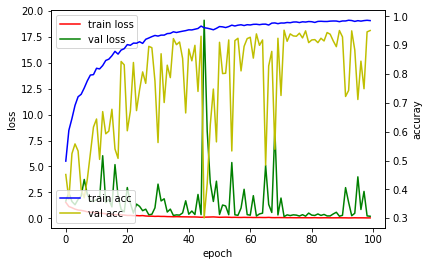

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'r', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'g', label='val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'y', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [ ]:
from keras.models import load_model
model.save('/content/drive/Shareddrives/yeja/Garbage classification/garbage_classification_model_upgrade.h5')

### 모델 불러오기

In [ ]:
from keras.models import load_model
model = load_model('/content/drive/Shareddrives/yeja/Garbage classification/garbage_classification_model_upgrade.h5')

In [22]:
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=16)
print('')
print('loss_and_metrics : ' + str(loss_and_metrics))

215/215 [==============================] - 2s 8ms/step - loss: 0.1928 - accuracy: 0.9542

loss_and_metrics : [0.1928294599056244, 0.9542006850242615]


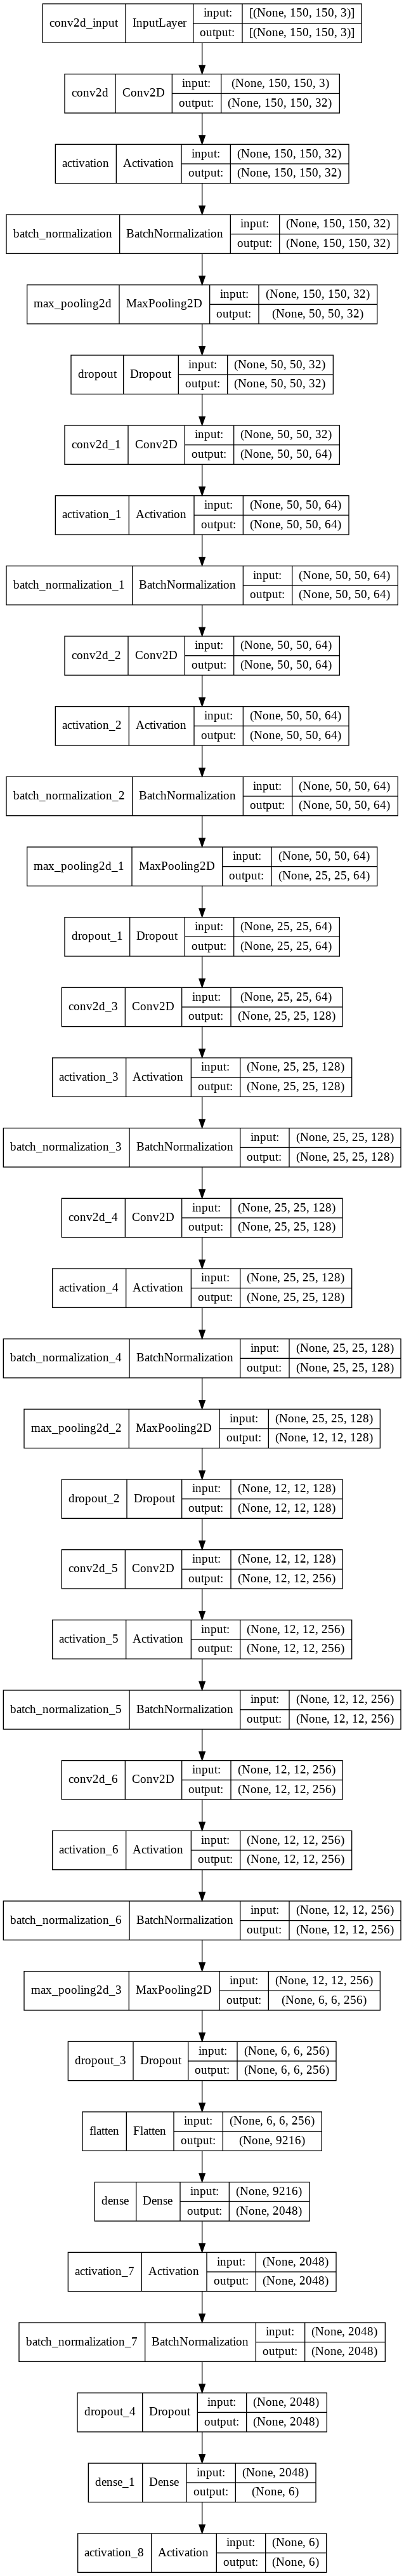

In [23]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='/content/drive/Shareddrives/yeja/Garbage classification/sample1_model_architecture.png')
plot_model(model, to_file='/content/drive/Shareddrives/yeja/Garbage classification/sample1_model_shapes.png', show_shapes=True)

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 activation (Activation)     (None, 150, 150, 32)      0         
                                                                 
 batch_normalization (BatchN  (None, 150, 150, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 50, 50, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 64)        1

In [ ]:
predictions = model.predict(x_test, verbose=1)

108/108 [==============================] - 9s 9ms/step


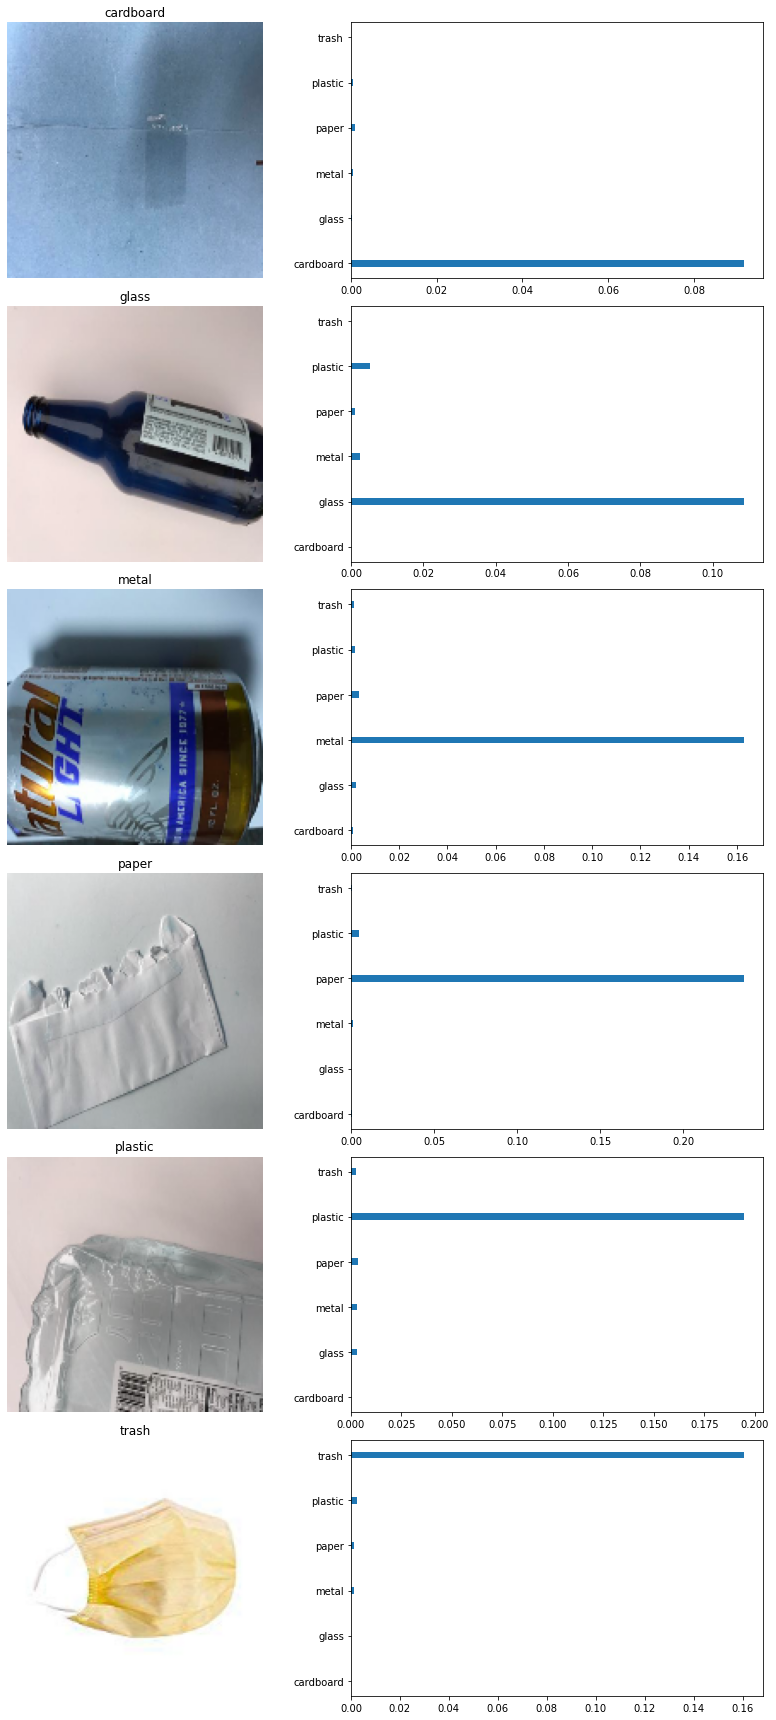

In [ ]:
# 데이터 테스트
def load_label_names():
    return ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']

def display_image_predictions(features, labels, predictions):
    n_classes = 6
    label_names = load_label_names()
    label_binarizer = LabelBinarizer()
    label_binarizer.fit(range(n_classes))
    label_ids = label_binarizer.inverse_transform(np.array(labels))

    fig, axs = plt.subplots(6, 2, figsize=(12,24))
    margin = 0.05
    ind = np.arange(n_classes)
    width = (1. - 2. * margin) / n_classes    
    arr_features = [None]*10
    arr_predictions = np.zeros((6, 6))
    last_image_i = 0
    
    for i, prediction in enumerate(predictions):
        label_id = label_ids[i]
        feature = features[i]
        arr_features[label_id] = feature
        max_id = np.argmax(prediction)
        arr_predictions[label_id][max_id] += 1
        last_image_i = i

    arr_predictions /= last_image_i
    
    for i in range(6):
      feature = arr_features[i]
      pred_name = label_names[i]
      prediction = arr_predictions[i]
      axs[i][0].imshow(feature)
      axs[i][0].set_title(pred_name)
      axs[i][0].set_axis_off()

      axs[i][1].barh(ind + margin, prediction, width)
      axs[i][1].set_yticks(ind + margin)
      axs[i][1].set_yticklabels(label_names)

    plt.tight_layout()

display_image_predictions(x_test, y_test, predictions)

In [ ]:
import os
import cv2
from tqdm import tqdm

def image2array(x_test):
  images1 = []
  labels = []
  x_test = cv2.imread(x_test)
  image1 = cv2.resize(x_test, (150, 150))
  images1.append(image1)
  x_test = np.array(image1, dtype='float32')/255.0
  return x_test

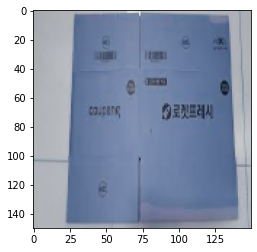

Predicted Result = cardboard


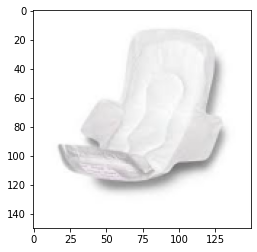

Predicted Result = trash


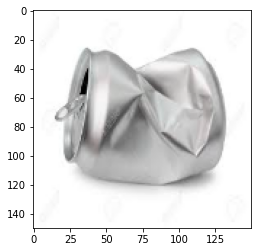

Predicted Result = metal


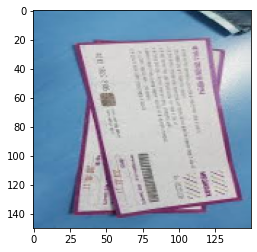

Predicted Result = paper


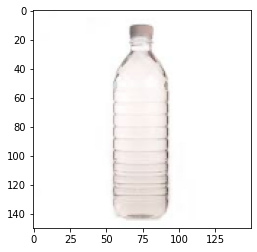

Predicted Result = plastic


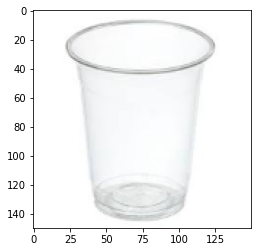

Predicted Result = glass


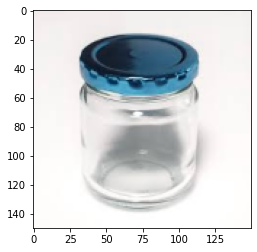

Predicted Result = metal


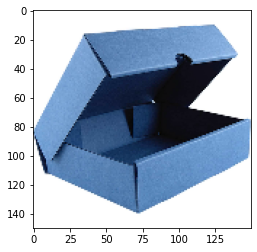

Predicted Result = cardboard


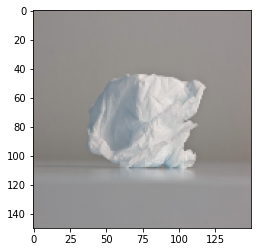

Predicted Result = trash


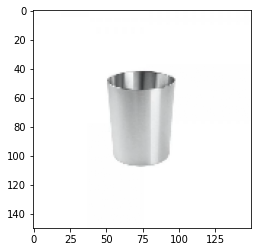

Predicted Result = metal


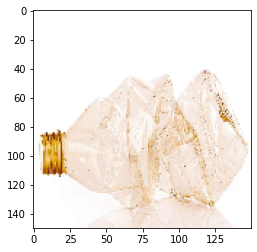

Predicted Result = plastic


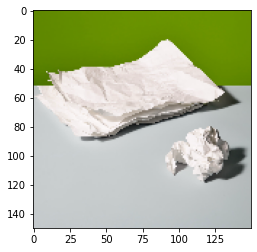

Predicted Result = paper


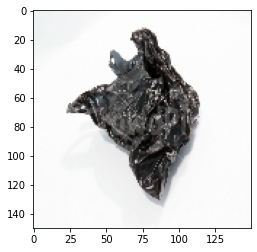

Predicted Result = metal


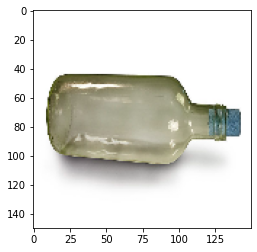

Predicted Result = glass


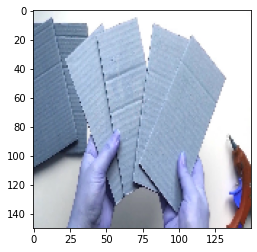

Predicted Result = cardboard


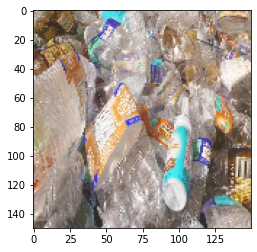

Predicted Result = plastic


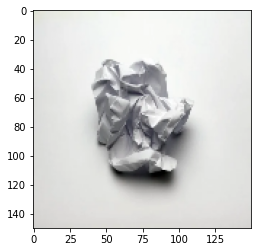

Predicted Result = metal


In [ ]:
import cv2
import tensorflow as tf

CATEGORIES = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']
f = '/content/drive/Shareddrives/yeja/Garbage classification/test_image/'

import os
for filename in os.listdir(f):
  filename = os.path.join(f, filename)
  x_test = image2array(filename)
  test_shape = x_test.shape
  x_test = x_test.reshape(1, test_shape[0], test_shape[1], test_shape[2])
  predictions = model.predict(x_test)
  max_id = np.argmax(predictions)
  x_test = x_test.reshape(test_shape[0], test_shape[1], test_shape[2])
  plt.imshow(x_test)
  plt.show()
  print('Predicted Result = ' + CATEGORIES[max_id])